In [57]:
#denetimsiz öğrenimde bağıumlı değişken y olmaz o yüzden bağımsız değişkenlerin arasında uzaklıklarına bakarak gruplandırma yapılır

In [58]:
#grupların için homojen gruplar kendi aralarında heterojen olucak bi kümeleme amaclanır

# K-Means 

In [1]:
#grupların için homojen gruplar kendi aralarında heterojen olucak bi kümeleme yöntemidir

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import warnings
warnings.filterwarnings("ignore",category=DeprecationWarning)
warnings.filterwarnings("ignore",category=FutureWarning)

In [8]:
df=pd.read_csv("USArrests.csv",index_col=0)
df.head()

,Murder,Assault,UrbanPop,Rape
Alabama,13.2,236,58,21.2
Alaska,10.0,263,48,44.5
Arizona,8.1,294,80,31.0
Arkansas,8.8,190,50,19.5
California,9.0,276,91,40.6


In [10]:
df.isnull().sum()

Murder      0
Assault     0
UrbanPop    0
Rape        0
dtype: int64

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 50 entries, Alabama to Wyoming
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Murder    50 non-null     float64
 1   Assault   50 non-null     int64  
 2   UrbanPop  50 non-null     int64  
 3   Rape      50 non-null     float64
dtypes: float64(2), int64(2)
memory usage: 2.0+ KB


In [13]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Murder,50.0,7.788,4.355510,0.8,4.075,7.25,11.250,17.4
Assault,50.0,170.760,83.337661,45.0,109.000,159.00,249.000,337.0
UrbanPop,50.0,65.540,14.474763,32.0,54.500,66.00,77.750,91.0
Rape,50.0,21.232,9.366385,7.3,15.075,20.10,26.175,46.0


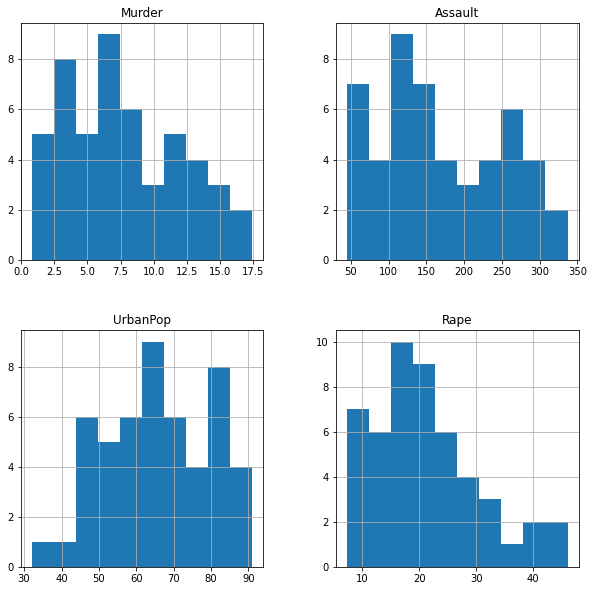

In [15]:
df.hist(figsize=(10,10));#dağılımlar simetrik deil

In [16]:
kmeans=KMeans(n_clusters=4)#küme

In [19]:
dir(kmeans)

['__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_check_mkl_vcomp',
 '_check_n_features',
 '_check_params',
 '_check_test_data',
 '_estimator_type',
 '_get_param_names',
 '_get_tags',
 '_init_centroids',
 '_more_tags',
 '_repr_html_',
 '_repr_html_inner',
 '_repr_mimebundle_',
 '_transform',
 '_validate_center_shape',
 '_validate_data',
 'algorithm',
 'copy_x',
 'fit',
 'fit_predict',
 'fit_transform',
 'get_params',
 'init',
 'max_iter',
 'n_clusters',
 'n_init',
 'n_jobs',
 'precompute_distances',
 'predict',
 'random_state',
 'score',
 'set_params',
 'tol',
 'transform',
 'verbose']

In [20]:
k_fit=kmeans.fit(df)

In [21]:
k_fit.n_clusters#kümeler

4

In [22]:
k_fit.cluster_centers_#merkezler

array([[ 11.8125    , 272.5625    ,  68.3125    ,  28.375     ],
       [  2.95      ,  62.7       ,  53.9       ,  11.51      ],
       [  8.21428571, 173.28571429,  70.64285714,  22.84285714],
       [  5.59      , 112.4       ,  65.6       ,  17.27      ]])

In [23]:
k_fit.labels_#sınıfları

array([0, 0, 0, 2, 0, 2, 3, 0, 0, 2, 1, 3, 0, 3, 1, 3, 3, 0, 1, 0, 2, 0,
       1, 0, 2, 3, 3, 0, 1, 2, 0, 0, 0, 1, 3, 2, 2, 3, 2, 0, 1, 2, 2, 3,
       1, 2, 2, 1, 1, 2])

In [24]:
k_means=KMeans(n_clusters=2).fit(df)#bağımlı veya bağımsız değişken olmadığı için y x değil bütün veriyi alabiliriz
kümeler=k_means.labels_

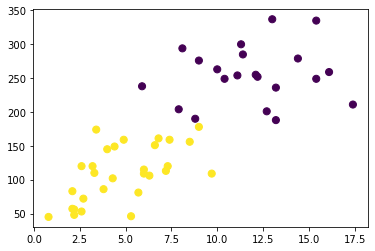

In [28]:
plt.scatter(df.iloc[:,0],df.iloc[:,1],c=kümeler,s=50,cmap="viridis");#2 kümeye ayrıldı

In [29]:
merkezler=k_means.cluster_centers_

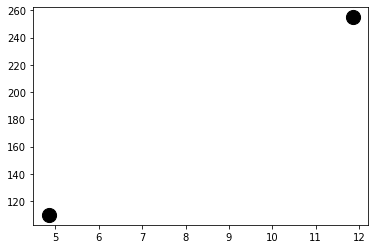

In [30]:
plt.scatter(merkezler[:,0],merkezler[:,1],c="black",s=200);#2 merkeze ayrıldı

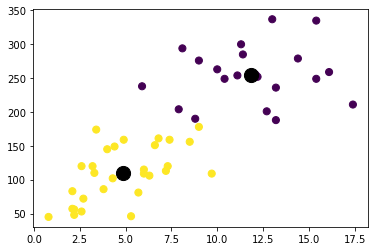

In [31]:
plt.scatter(df.iloc[:,0],df.iloc[:,1],c=kümeler,s=50,cmap="viridis");
plt.scatter(merkezler[:,0],merkezler[:,1],c="black",s=200);#kümelerin merkeze uzaklığı

In [32]:
#optimum küme sayısını bulma(her zaman bu algoritmalara önerdiği şeylere güvenmeyebilirz iş koşulları neyi gerektiriyosa onun yapılması gerekbilir)

In [33]:
ssd=[]
K=range(1,30)
for k in K:
    kmeans=KMeans(k).fit(df)
    ssd.append(kmeans.inertia_)#artıkların mutlak değer toplamını veren kod

C:\Users\kadosama\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [34]:
ssd

[355807.82159999997,
 96399.02814449919,
 47964.265357142845,
 34728.629357142854,
 24417.023523809516,
 18850.365333333335,
 15463.47377777778,
 13329.36197619048,
 11125.033809523811,
 10147.60911904762,
 9382.55845238095,
 8138.596976190476,
 7235.392333333332,
 6505.12364285714,
 6037.063166666665,
 5148.573166666667,
 4593.307809523809,
 4248.624166666667,
 3838.0023333333334,
 3548.6056666666655,
 3090.5308333333323,
 2790.5181666666667,
 2481.9406666666655,
 2242.3663333333334,
 2025.626666666666,
 1768.118,
 1624.51,
 1486.6733333333334,
 1365.1249999999998]

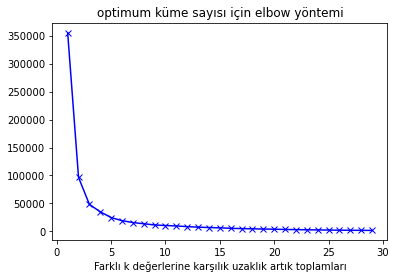

In [36]:
plt.plot(K,ssd,"bx-")
plt.xlabel("Farklı k değerlerine karşılık uzaklık artık toplamları")
plt.title("optimum küme sayısı için elbow yöntemi");

In [37]:
#diğerine göre daha detaylı bi fonk

In [46]:
!pip install -U yellowbrick

In [48]:
pip install -U scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [49]:
from yellowbrick.cluster import KElbowVisualizer #çalışmıyor kütüphane fotosunu çektim ordan bak

ImportError: cannot import name 'available_if' from 'sklearn.utils.metaestimators' (C:\Users\kadosama\anaconda3\lib\site-packages\sklearn\utils\metaestimators.py)

In [50]:
#grafiğin önerdiği gibi küme sayısı 4 olmalı o yüzden:
kmeans=KMeans(4).fit(df)
kümeler=kmeans.labels_

In [51]:
pd.DataFrame({"Eyalet":df.index,"kumeler":kümeler}) #ayırma işlemi başarılı (segmentasyon)

,Eyalet,kumeler
0,Alabama,1
1,Alaska,1
2,Arizona,1
3,Arkansas,0
4,California,1
5,Colorado,0
6,Connecticut,3
7,Delaware,1
8,Florida,1
9,Georgia,0


In [52]:
df["küme no"]=kümeler

In [53]:
df

,Murder,Assault,UrbanPop,Rape,küme no
Alabama,13.2,236,58,21.2,1
Alaska,10.0,263,48,44.5,1
Arizona,8.1,294,80,31.0,1
Arkansas,8.8,190,50,19.5,0
California,9.0,276,91,40.6,1
Colorado,7.9,204,78,38.7,0
Connecticut,3.3,110,77,11.1,3
Delaware,5.9,238,72,15.8,1
Florida,15.4,335,80,31.9,1
Georgia,17.4,211,60,25.8,0


# Hiyerarşik Kümeleme


In [60]:
#burda kümenin kümesi olur gene aynı amaca hizmet eder ama tümevarım ya da tümdengelim şeklinde hiyerarşik alt kümelere ayrılma vardır

In [61]:
from scipy.cluster.hierarchy import linkage

In [72]:
hc_complete=linkage(df,"complete")
#dendogram ayrımı yani hiyerarşik ayrım  
hc_average=linkage(df,"average")

In [67]:
from scipy.cluster.hierarchy import dendrogram

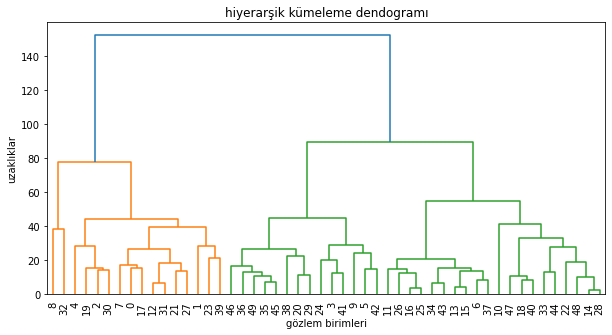

In [69]:
plt.figure(figsize=(10,5))
plt.title("hiyerarşik kümeleme dendogramı")
plt.xlabel("gözlem birimleri")
plt.ylabel("uzaklıklar")
dendrogram(hc_complete,leaf_font_size=10)
plt.show()#; yerine kullanılabilir

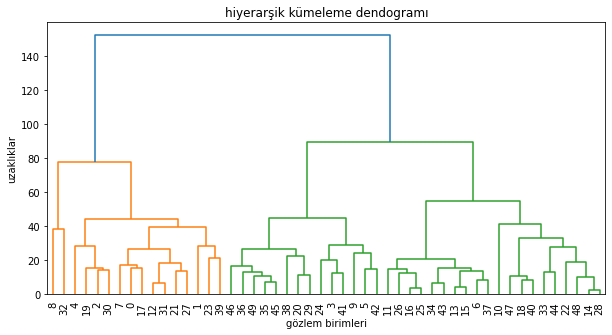

In [73]:
plt.figure(figsize=(10,5))
plt.title("hiyerarşik kümeleme dendogramı")
plt.xlabel("gözlem birimleri")
plt.ylabel("uzaklıklar")
dendrogram(hc_average,leaf_font_size=10)
plt.show()#; yerine kullanılabilir

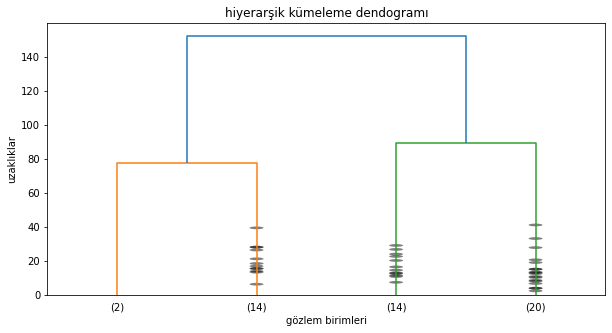

In [70]:
plt.figure(figsize=(10,5))
plt.title("hiyerarşik kümeleme dendogramı")
plt.xlabel("gözlem birimleri")
plt.ylabel("uzaklıklar")
dendrogram(hc_complete,truncate_mode="lastp",p=4,show_contracted=True,leaf_font_size=10)
plt.show()#; yerine kullanılabilir
#her dal küme ve düzenlemelerle kümelerdeki gözlem sayısına baktık 

# Temel Bileşen Analizi(pca)


In [74]:
#temel fikir çok değişkenli(boyutlu) verinin ana özellikleri daha az değişkenle temsil etmeye çalışmaktır,yani küçük miktardaki bilgi kaybını göze alıp değişken boyutunu azaltmayı amaçlıyoruz burda 

In [78]:
df=pd.read_csv("Hitters.csv")
df.dropna(inplace=True)
df=df._get_numeric_data()
df.head()
#burdaki amacımız 14 15 değişken yerine 2 3 değişkenle de bu modeli kurabilirmiyiz ona bakıcaz

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,PutOuts,Assists,Errors,Salary
1,315,81,7,24,38,39,14,3449,835,69,321,414,375,632,43,10,475.0
2,479,130,18,66,72,76,3,1624,457,63,224,266,263,880,82,14,480.0
3,496,141,20,65,78,37,11,5628,1575,225,828,838,354,200,11,3,500.0
4,321,87,10,39,42,30,2,396,101,12,48,46,33,805,40,4,91.5
5,594,169,4,74,51,35,11,4408,1133,19,501,336,194,282,421,25,750.0


In [79]:
from sklearn.preprocessing import StandardScaler

In [80]:
df=StandardScaler().fit_transform(df)

In [82]:
df[0:5,0:5]

array([[-0.6029005 , -0.59567545, -0.5285512 , -1.2061115 , -0.52206292],
       [ 0.51254171,  0.49225957,  0.72996619,  0.44151497,  0.79405962],
       [ 0.62816682,  0.73648988,  0.95878753,  0.40228577,  1.02631654],
       [-0.56209164, -0.46245892, -0.18531919, -0.61767348, -0.36722498],
       [ 1.29471156,  1.35816704, -0.87178322,  0.75534858, -0.0188396 ]])

In [83]:
from sklearn.decomposition import PCA

In [84]:
pca=PCA(n_components=2)
pca_fit=pca.fit_transform(df)#2 bileşene(Değişkene) indirgendi

In [85]:
bileşendf=pd.DataFrame(data=pca_fit,columns=["1.bileşen","2.bileşen"])

In [86]:
bileşendf

,1.bileşen,2.bileşen
0,0.076848,1.653525
1,0.337127,-2.320560
2,3.408362,0.755757
3,-2.642221,-0.361486
4,1.071681,-1.511674
...,...,...
258,-0.152111,-0.331665
259,3.241373,-0.391942
260,-1.206322,-0.625714
261,2.084856,-2.059851


In [90]:
pca.explained_variance_ratio_#toplamı veri setinin içindeki değişkenliği 2 bileşenle açıklama oranın verir

array([0.45245466, 0.24246801])

In [91]:
pca.components_

array([[ 0.19506377,  0.19410007,  0.19690453,  0.19491272,  0.22956638,
         0.20673717,  0.271085  ,  0.31970454,  0.32077315,  0.30810145,
         0.32761493,  0.32977446,  0.30573146,  0.08303783,  0.00159189,
        -0.00529271,  0.24914187],
       [-0.38407792, -0.37764493, -0.22866298, -0.37459128, -0.31026531,
        -0.23115759,  0.26820405,  0.19641268,  0.18589726,  0.13386448,
         0.17692929,  0.17283361,  0.19698297, -0.16295204, -0.17624626,
        -0.20978299, -0.05452611]])

In [92]:
pca.components_[1]

array([-0.38407792, -0.37764493, -0.22866298, -0.37459128, -0.31026531,
       -0.23115759,  0.26820405,  0.19641268,  0.18589726,  0.13386448,
        0.17692929,  0.17283361,  0.19698297, -0.16295204, -0.17624626,
       -0.20978299, -0.05452611])

In [93]:
#optimum bileşen sayısı

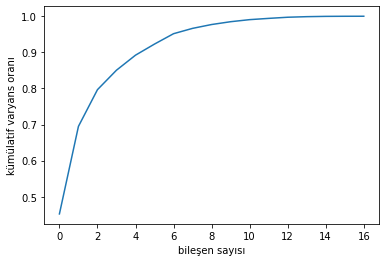

In [97]:
pca=PCA().fit(df)#default değişken sayısı kadar bileşen oluşturur
plt.plot(np.cumsum(pca.explained_variance_ratio_))#kümülatif sum
plt.xlabel("bileşen sayısı")
plt.ylabel("kümülatif varyans oranı");

In [98]:
#yukardan yüzdesine bakarak bize uygun olanı final modeli için kullanalım

In [99]:
pca=PCA(n_components=3)
pca_fit=pca.fit_transform(df)

In [101]:
pca.explained_variance_ratio_

array([0.45245466, 0.24246801, 0.1016968 ])